In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset/sleep_health_and_lifestyle_dataset.csv')

In [3]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [5]:
df.iloc[:, :-1].isnull().values.any() # Verificando se Exist algum valor Null nos Preditores (Features)

False

In [6]:
df = df.drop(columns=['Person ID', 'Blood Pressure'])

In [7]:
df["Sleep Disorder"].fillna("No Problem", inplace = True)
df.iloc[:, -1].isnull().values.any()

False

<Figure size 640x480 with 0 Axes>

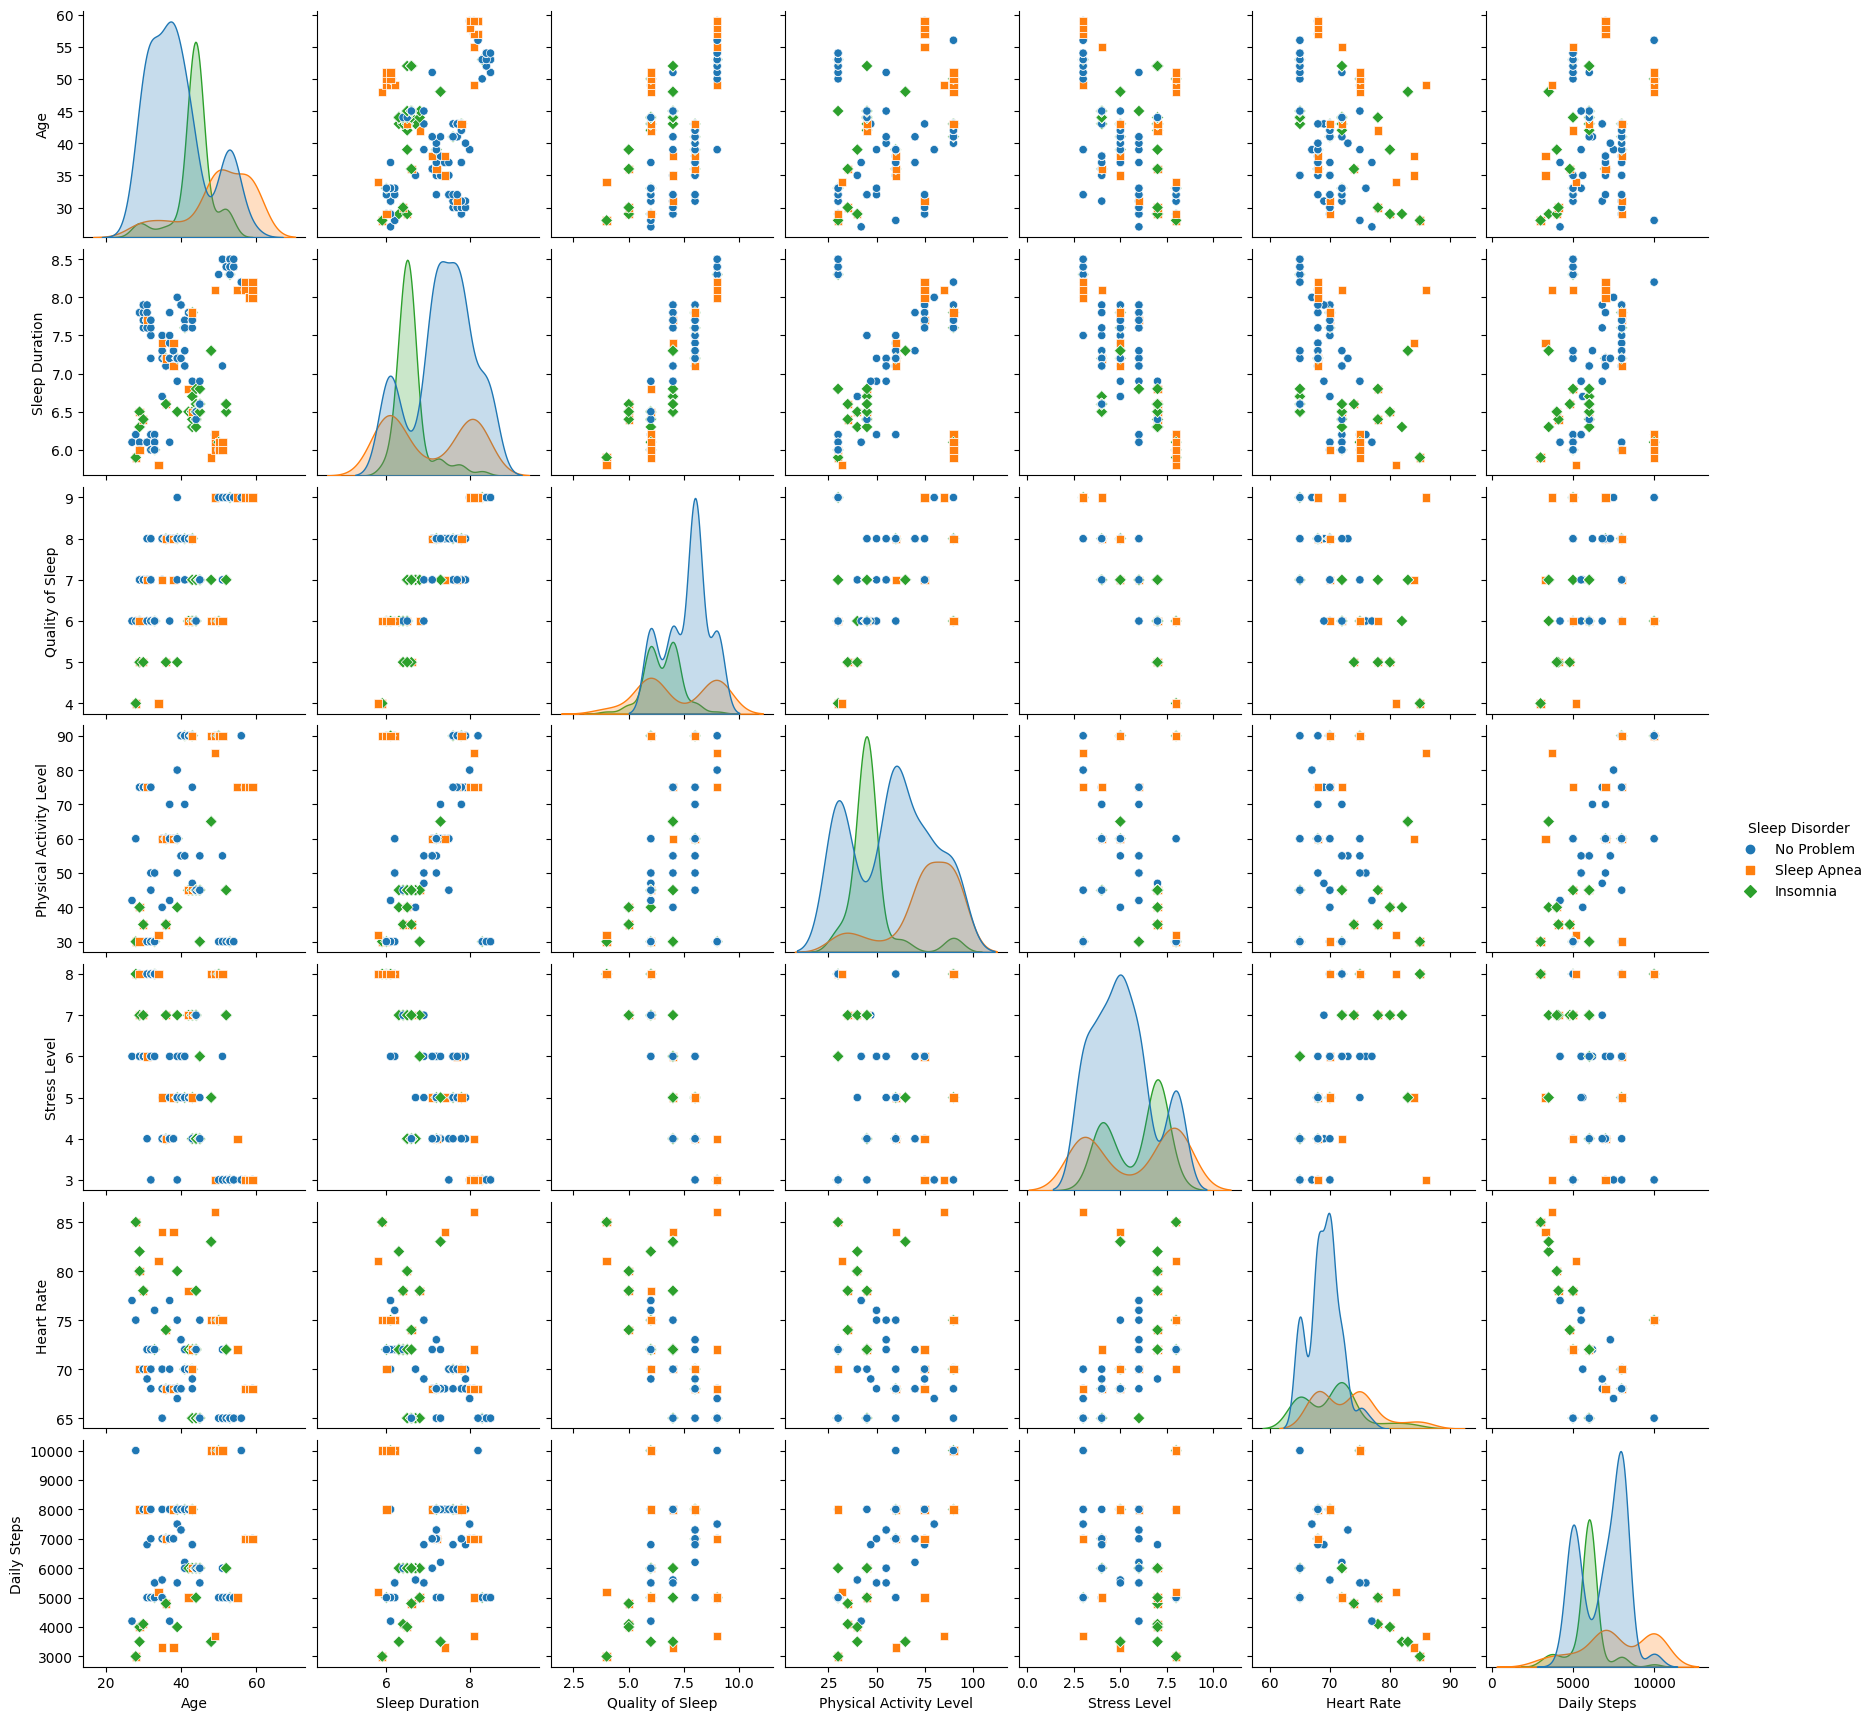

In [8]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(6.4,4.8))
plot = sns.pairplot(df, hue='Sleep Disorder', markers=["o", "s", "D"])
plt.show()

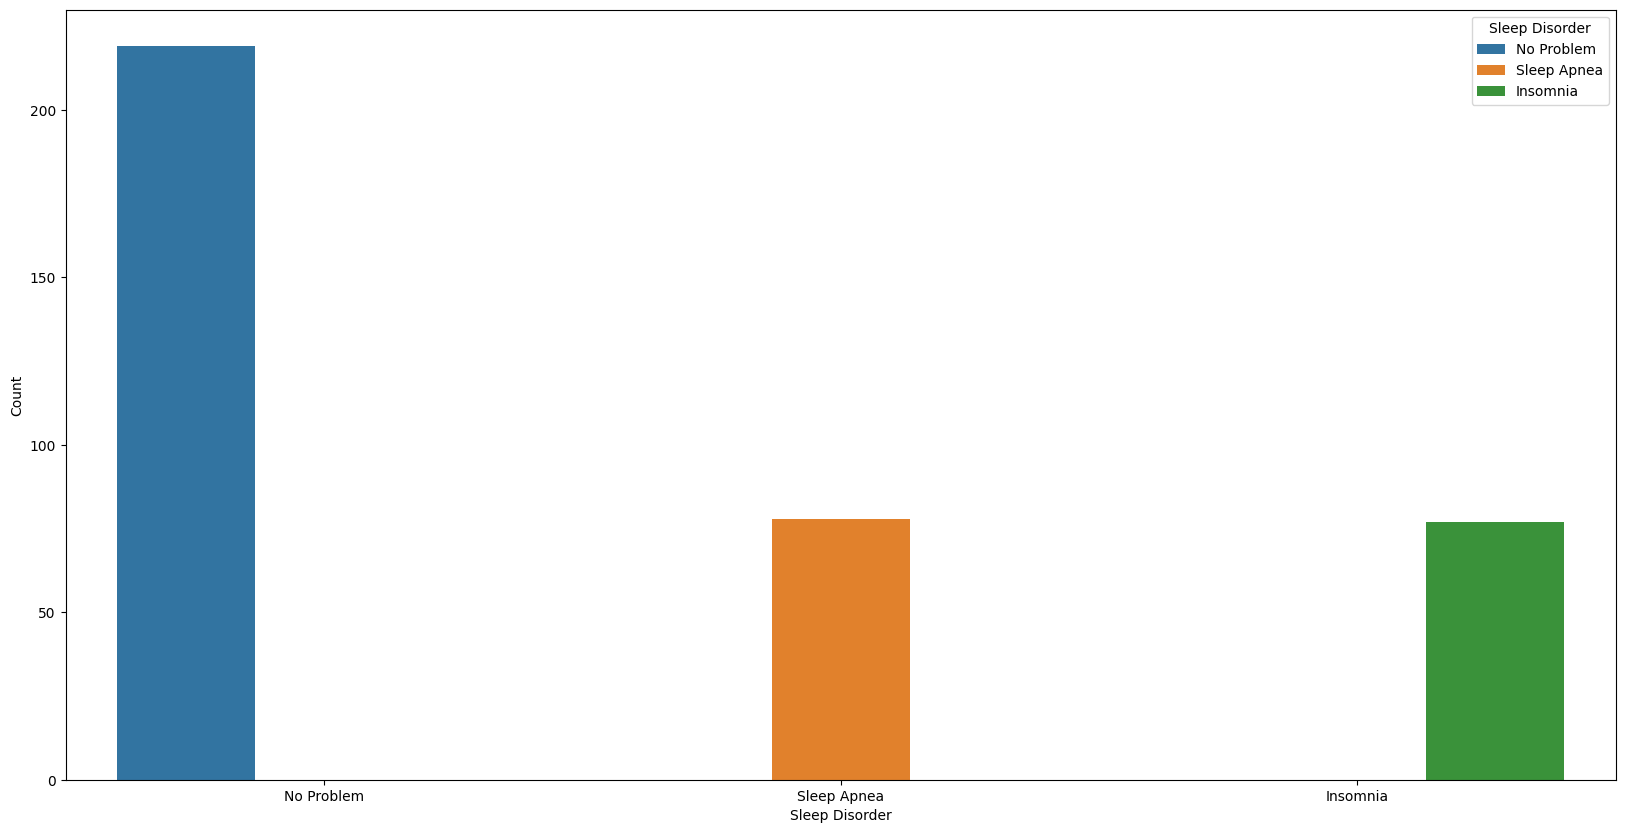

In [9]:
dft = df['Sleep Disorder'].value_counts().reset_index(name='Count')
plt.figure(figsize=(20,10))
plot = sns.barplot(x='Sleep Disorder', y='Count', data=dft, hue='Sleep Disorder')
# fig = plot.get_figure()
# fig.savefig("barplot.png")
plt.show()

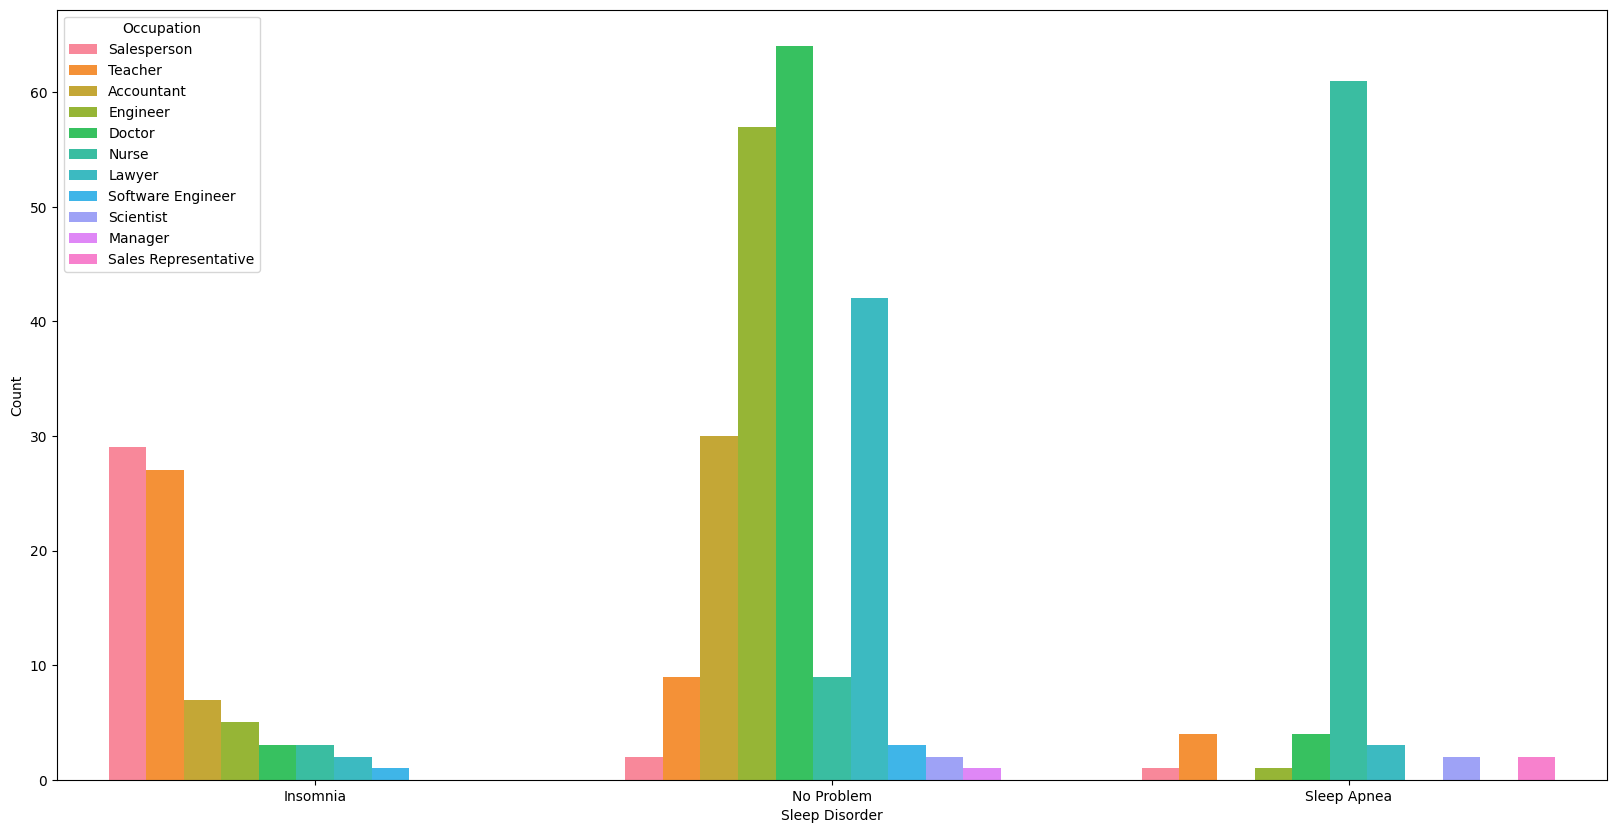

In [10]:
dft = df.groupby(['Sleep Disorder']).Occupation.value_counts().reset_index(name='Count')
plt.figure(figsize=(20,10))
sns.barplot(x='Sleep Disorder', y='Count', data=dft, hue='Occupation', saturation=1)
plt.show()

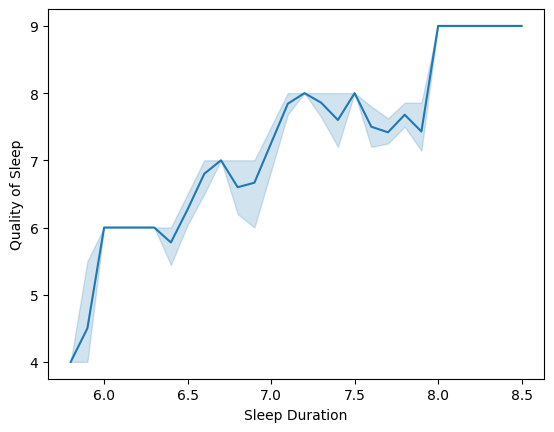

In [11]:
sns.lineplot(data=df, x="Sleep Duration", y="Quality of Sleep")
plt.show()

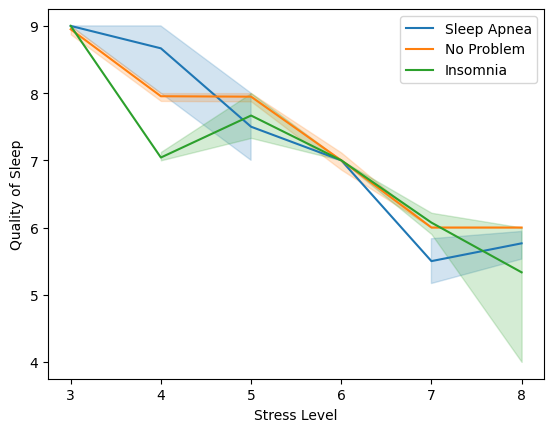

In [12]:
apnea = df[df['Sleep Disorder']=='Sleep Apnea'].reset_index(drop=True)
noproblem = df[df['Sleep Disorder']=='No Problem'].reset_index(drop=True)
insomnia = df[df['Sleep Disorder']=='Insomnia'].reset_index(drop=True)

sns.lineplot(x='Stress Level', y='Quality of Sleep', data=apnea, legend='auto', label='Sleep Apnea')
sns.lineplot(x='Stress Level', y='Quality of Sleep', data=noproblem, legend='auto', label='No Problem')
sns.lineplot(x='Stress Level', y='Quality of Sleep', data=insomnia, legend='auto', label='Insomnia')

plt.show()

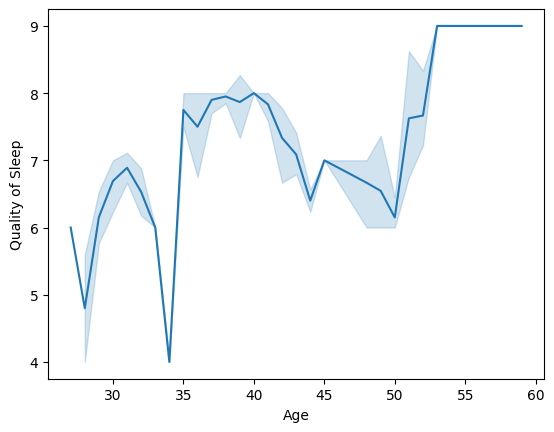

In [13]:
sns.lineplot(data=df, x="Age", y="Quality of Sleep")
plt.show()

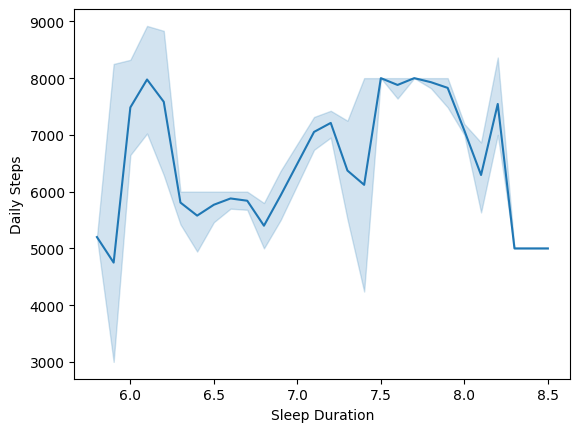

In [14]:
sns.lineplot(data=df, x='Sleep Duration', y='Daily Steps')
plt.show()

In [15]:
columns = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps']
target = 'Sleep Disorder'
X = df.loc[:, columns].values
y = df.loc[:, target].values

In [16]:
# def calc_vif(X):
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return (vif)

# columns_for_vif = ['Age', 'Stress Level']
# calc_vif(df.loc[:, columns_for_vif])

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [18]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 2, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [19]:
X[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 27, 6.1, 6, 42, 6, 77, 4200], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
from collections import Counter
print(f'Counter of Y Classes in training {Counter(y_train)}')


# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
# X_train, y_train = X_train_res, y_train_res

# print(f'Counter of Y Classes in Training after nearmiss {Counter(y_train)}')

Counter of Y Classes in training Counter({1: 176, 2: 62, 0: 61})


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:] = sc.fit_transform(X_train[:, 0:])
X_test[:, 0:] = sc.transform(X_test[:, 0:])

In [24]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=42, max_iter=512).fit(X_train, y_train)
lr_prediction = lr_classifier.predict(X_test)

In [25]:
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             classification_report, confusion_matrix, f1_score,
                             precision_score, recall_score)


In [26]:
lr_accuracy = accuracy_score(y_test, lr_prediction)
lr_precision = precision_score(y_test, lr_prediction, average='weighted', zero_division=np.nan)
lr_f1 = f1_score(y_test, lr_prediction, average='weighted', zero_division=np.nan)
lr_recall = recall_score(y_test, lr_prediction, average='weighted', zero_division=np.nan)

In [27]:
print(f'Accuracy: {lr_accuracy}')
print(f'Precision: {lr_precision}')
print(f'F1: {lr_f1}')
print(f'Recall: {lr_recall}')
print(f'Report:\n {classification_report(y_test, lr_prediction)}')

Accuracy: 0.88
Precision: 0.8869909622541201
F1: 0.8786688560481664
Recall: 0.88
Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.93      0.95      0.94        43
           2       0.92      0.69      0.79        16

    accuracy                           0.88        75
   macro avg       0.86      0.84      0.84        75
weighted avg       0.89      0.88      0.88        75



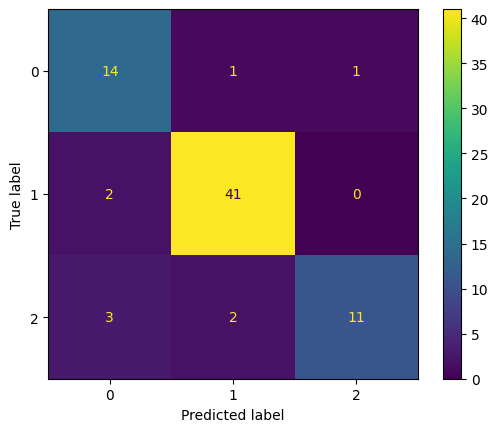

In [28]:
cm = confusion_matrix(y_test, lr_prediction, labels=lr_classifier.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_classifier.classes_).plot()
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier(random_state=42).fit(X_train, y_train)
rfc_prediction = rfc_classifier.predict(X_test)

In [30]:
rfc_accuracy = accuracy_score(y_test, rfc_prediction)
rfc_precision = precision_score(y_test, rfc_prediction, average='weighted', zero_division=np.nan)
rfc_f1 = f1_score(y_test, rfc_prediction, average='weighted', zero_division=np.nan)
rfc_recall = recall_score(y_test, rfc_prediction, average='weighted', zero_division=np.nan)

In [31]:
print(f'Accuracy: {rfc_accuracy}')
print(f'Precision: {rfc_precision}')
print(f'F1: {rfc_f1}')
print(f'Recall: {rfc_recall}')
print(f'Report:\n {classification_report(y_test, rfc_prediction)}')

Accuracy: 0.88
Precision: 0.8787611865258924
F1: 0.8771926158133053
Recall: 0.88
Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.93      0.98      0.95        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.85      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



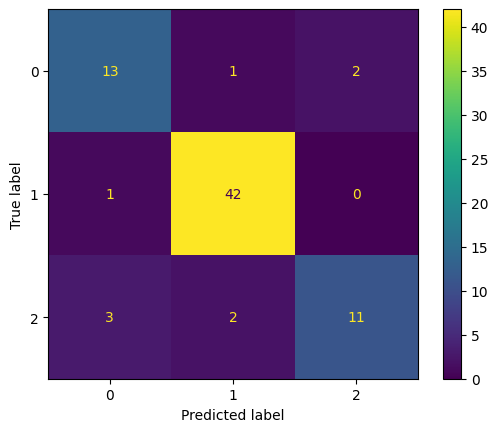

In [32]:
cm = confusion_matrix(y_test, rfc_prediction, labels=rfc_classifier.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_classifier.classes_).plot()
plt.show()

In [33]:
from sklearn.neural_network import MLPClassifier
MLPC_classifier = MLPClassifier(random_state=42).fit(X_train, y_train)
MLPC_prediction = MLPC_classifier.predict(X_test)

In [34]:
MLPC_accuracy = accuracy_score(y_test, MLPC_prediction)
MLPC_precision = precision_score(y_test, MLPC_prediction, average='weighted', zero_division=np.nan)
MLPC_f1 = f1_score(y_test, MLPC_prediction, average='weighted', zero_division=np.nan)
MLPC_recall = recall_score(y_test, MLPC_prediction, average='weighted', zero_division=np.nan)

In [35]:
print(f'Accuracy: {MLPC_accuracy}')
print(f'Precision: {MLPC_precision}')
print(f'F1: {MLPC_f1}')
print(f'Recall: {MLPC_recall}')
print(f'Report:\n {classification_report(y_test, MLPC_prediction)}')

Accuracy: 0.8933333333333333
Precision: 0.9000212652844232
F1: 0.8918489326765189
Recall: 0.8933333333333333
Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.95      0.98      0.97        43
           2       0.92      0.69      0.79        16

    accuracy                           0.89        75
   macro avg       0.87      0.85      0.85        75
weighted avg       0.90      0.89      0.89        75



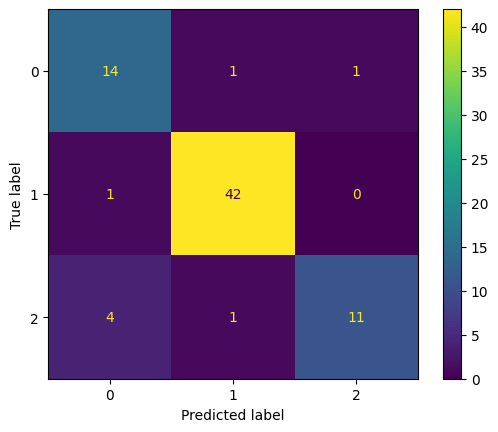

In [36]:
cm = confusion_matrix(y_test, MLPC_prediction, labels=MLPC_classifier.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=MLPC_classifier.classes_).plot()
plt.show()